In [1]:
import pandas as pd

data = pd.read_excel('Final_Labelled_Data_new.xlsx', engine='openpyxl')
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
3887   1.0     spam  Hi Patron, it's the Final Call to shop at the ...   
3888   1.0     spam  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889   1.0     spam  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890   1.0     spam  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891   1.0     spam  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
3887  english  Hi Patron, it's the Final Call to shop at the ...   
3888  english  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889  english  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890  english  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891  english  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     otp_transactions_other otp_transactions_other_new  
0                       OTP                transaction  
1                       OTP                        OTP  
2                       OTP                        OTP  
3                       OTP                        OTP  
4                       OTP                transaction  
...                     ...                        ...  
3887                  other                transaction  
3888                  other                   personal  
3889                  other                   personal  
3890                  other                   personal  
3891                  other                        OTP  

[3892 rows x 7 columns]

In [2]:
data['language'].value_counts()

english     3504
telugu       234
hinglish     105
hindi         50
Name: language, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['ham_spam_numeric'] = labelencoder.fit_transform(data['ham/spam'])
data['otp_transaction_numeric'] = labelencoder.fit_transform(data['otp_transactions_other_new'])
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
3887   1.0     spam  Hi Patron, it's the Final Call to shop at the ...   
3888   1.0     spam  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889   1.0     spam  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890   1.0     spam  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891   1.0     spam  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
3887  english  Hi Patron, it's the Final Call to shop at the ...   
3888  english  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889  english  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890  english  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891  english  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
3887                  other                transaction                 1   
3888                  other                   personal                 1   
3889                  other                   personal                 1   
3890                  other                   personal                 1   
3891                  other                        OTP                 1   

      otp_transaction_numeric  
0                           3  
1                           0  
2                           0  
3                           0  
4                           3  
...                       ...  
3887                        3  
3888                        2  
3889                        2  
3890                        2  
3891                        0  

[3892 rows x 9 columns]

In [4]:
print(data['ham/spam'].value_counts())
print(data['ham_spam_numeric'].value_counts())
print(data['otp_transactions_other_new'].value_counts())
print(data['otp_transaction_numeric'].value_counts())

ham     2815
spam    1078
Name: ham/spam, dtype: int64
0    2815
1    1078
Name: ham_spam_numeric, dtype: int64
personal       2409
transaction    1019
OTP             301
delivery        164
Name: otp_transactions_other_new, dtype: int64
2    2409
3    1019
0     301
1     164
Name: otp_transaction_numeric, dtype: int64


In [5]:
target_ham = ['ham', 'spam']
target_transaction = ['OTP','delivery','other','transaction']

# Preprocessing

In [6]:
import re
import numpy as np 
import pandas as pd 
import csv
import re, string
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

  

def text_process(text):
    text = text.lower()   
    #Remove urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)    
    #Remove usernames
    text = re.sub('@[^\s]+','',text)    
    #Remove white space
    text = text.strip()    
    #Remove hashtags
    text = re.sub(r'#([^\s]+)', '', text)   
    #Remove stopwords
    text = " ".join([word for word in text.split(' ') if word not in stopwords.words('english')])
    #Remove punctuation
    text = "".join(l for l in text if l not in string.punctuation)
    return text

data['message_clean']=data['message'].apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
3887   1.0     spam  Hi Patron, it's the Final Call to shop at the ...   
3888   1.0     spam  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889   1.0     spam  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890   1.0     spam  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891   1.0     spam  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
3887  english  Hi Patron, it's the Final Call to shop at the ...   
3888  english  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889  english  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890  english  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891  english  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
3887                  other                transaction                 1   
3888                  other                   personal                 1   
3889                  other                   personal                 1   
3890                  other                   personal                 1   
3891                  other                        OTP                 1   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
3887                        3   
3888                        2   
3889                        2   
3890                        2   
3891                        0   

                                          message_clean  
0     004645 secret otp txn inr 1189300 axis bank ca...  
1                133355 otp conﬁrmation regards ap sand  
2                223316 otp conﬁrmation regards ap sand  
3                237222 otp conﬁrmation regards ap sand  
4     269220 secret otp txn inr 1189300 axis bank ca...  
...                                                 ...  
3887  hi patron final call shop ajio stars sale get ...  
3888  dear member shop wrogn worth rs6999  get garme...  
3889  lenskart mega sale get 40 plus buy1get1 gold m...  
3890  bodapatiabhiteja get extra rs300 today\nand sh...  
3891  dear customertrends special offer get rs500 sh...  

[3892 rows x 10 columns]

In [8]:
#calculating the length of sentences in text column 
data['length_processed']=data['message_clean'].apply(len)
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
3887   1.0     spam  Hi Patron, it's the Final Call to shop at the ...   
3888   1.0     spam  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889   1.0     spam  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890   1.0     spam  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891   1.0     spam  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
3887  english  Hi Patron, it's the Final Call to shop at the ...   
3888  english  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889  english  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890  english  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891  english  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
3887                  other                transaction                 1   
3888                  other                   personal                 1   
3889                  other                   personal                 1   
3890                  other                   personal                 1   
3891                  other                        OTP                 1   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
3887                        3   
3888                        2   
3889                        2   
3890                        2   
3891                        0   

                                          message_clean  length_processed  
0     004645 secret otp txn inr 1189300 axis bank ca...               114  
1                133355 otp conﬁrmation regards ap sand                38  
2                223316 otp conﬁrmation regards ap sand                38  
3                237222 otp conﬁrmation regards ap sand                38  
4     269220 secret otp txn inr 1189300 axis bank ca...               114  
...                                                 ...               ...  
3887  hi patron final call shop ajio stars sale get ...                94  
3888  dear member shop wrogn worth rs6999  get garme...               130  
3889  lenskart mega sale get 40 plus buy1get1 gold m...               114  
3890  bodapatiabhiteja get extra rs300 today\nand sh...                98  
3891  dear customertrends special offer get rs500 sh...               141  

[3892 rows x 11 columns]

In [9]:
#calculating the length of sentences in text column 
data['length_original']=data['message'].apply(len)
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
3887   1.0     spam  Hi Patron, it's the Final Call to shop at the ...   
3888   1.0     spam  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889   1.0     spam  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890   1.0     spam  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891   1.0     spam  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
3887  english  Hi Patron, it's the Final Call to shop at the ...   
3888  english  Dear Member, Shop for WROGN worth Rs6999 & GET...   
3889  english  Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...   
3890  english  Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...   
3891  english  Dear Customer,TRENDS SPECIAL OFFER! Get Rs500 ...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
3887                  other                transaction                 1   
3888                  other                   personal                 1   
3889                  other                   personal                 1   
3890                  other                   personal                 1   
3891                  other                        OTP                 1   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
3887                        3   
3888                        2   
3889                        2   
3890                        2   
3891                        0   

                                          message_clean  length_processed  \
0     004645 secret otp txn inr 1189300 axis bank ca...               114   
1                133355 otp conﬁrmation regards ap sand                38   
2                223316 otp conﬁrmation regards ap sand                38   
3                237222 otp conﬁrmation regards ap sand                38   
4     269220 secret otp txn inr 1189300 axis bank ca...               114   
...                                                 ...               ...   
3887  hi patron final call shop ajio stars sale get ...                94   
3888  dear member shop wrogn worth rs6999  get garme...               130   
3889  lenskart mega sale get 40 plus buy1get1 gold m...               114   
3890  bodapatiabhiteja get extra rs300 today\nand sh...                98   
3891  dear customertrends special offer get rs500 sh...               141   

      length_original  
0                 157  
1                

In [10]:
data['otp_transactions_other_new'].value_counts()

personal       2409
transaction    1019
OTP             301
delivery        164
Name: otp_transactions_other_new, dtype: int64

In [11]:
data['otp_transaction_numeric'].value_counts()

2    2409
3    1019
0     301
1     164
Name: otp_transaction_numeric, dtype: int64

In [12]:
data.to_excel('Final_Labelled_Dataset_Preprocessed_new.xlsx', index=False)

# Graphs

<AxesSubplot:ylabel='Frequency'>

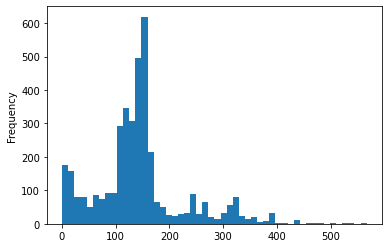

In [13]:
data['length_original'].plot(bins=50,kind='hist')

<AxesSubplot:ylabel='Frequency'>

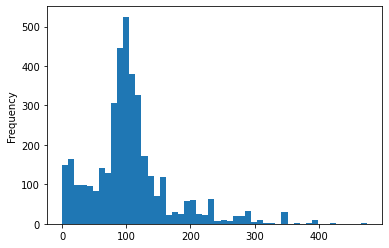

In [14]:
data['length_processed'].plot(bins=50,kind='hist')

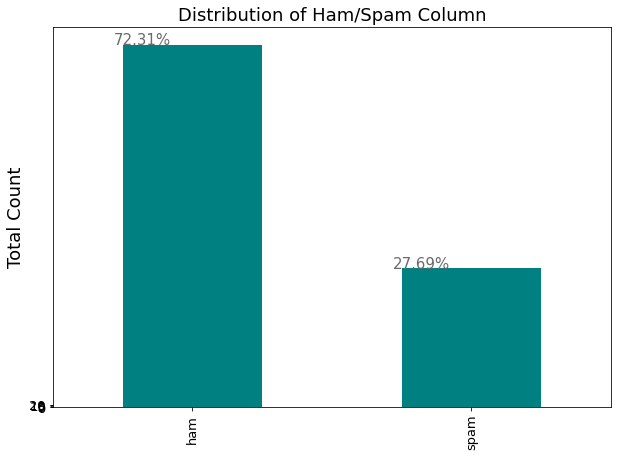

In [15]:
ax = data['ham/spam'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="teal", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Ham/Spam Column", fontsize=18)
ax.set_ylabel("Total Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

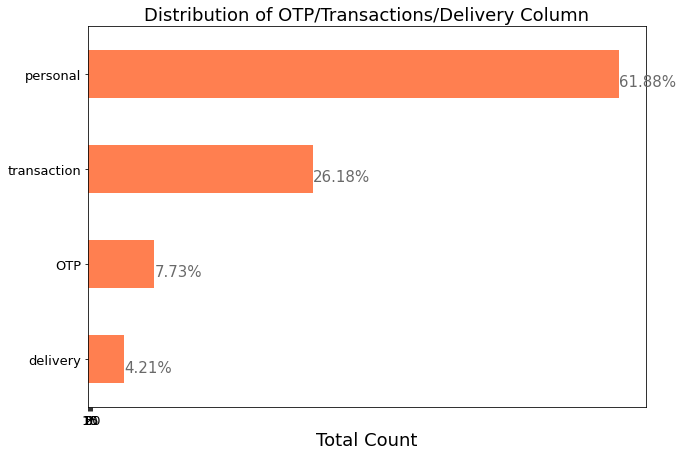

In [16]:
ax = data['otp_transactions_other_new'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of OTP/Transactions/Delivery Column", fontsize=18)
ax.set_xlabel("Total Count", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

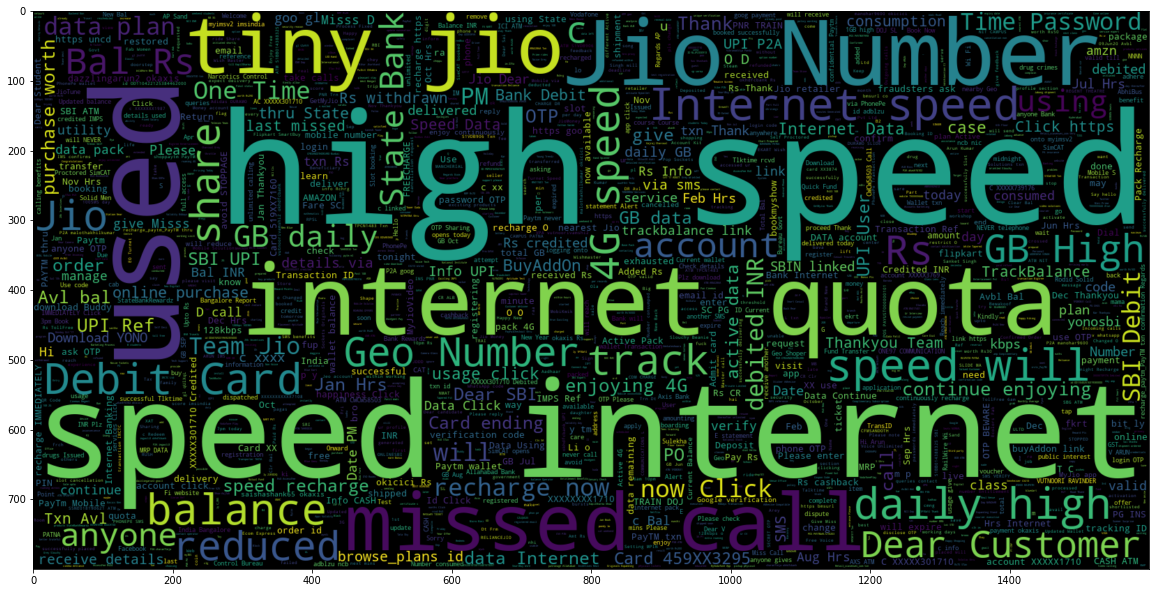

In [17]:
#ham

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.ham_spam_numeric == 0].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

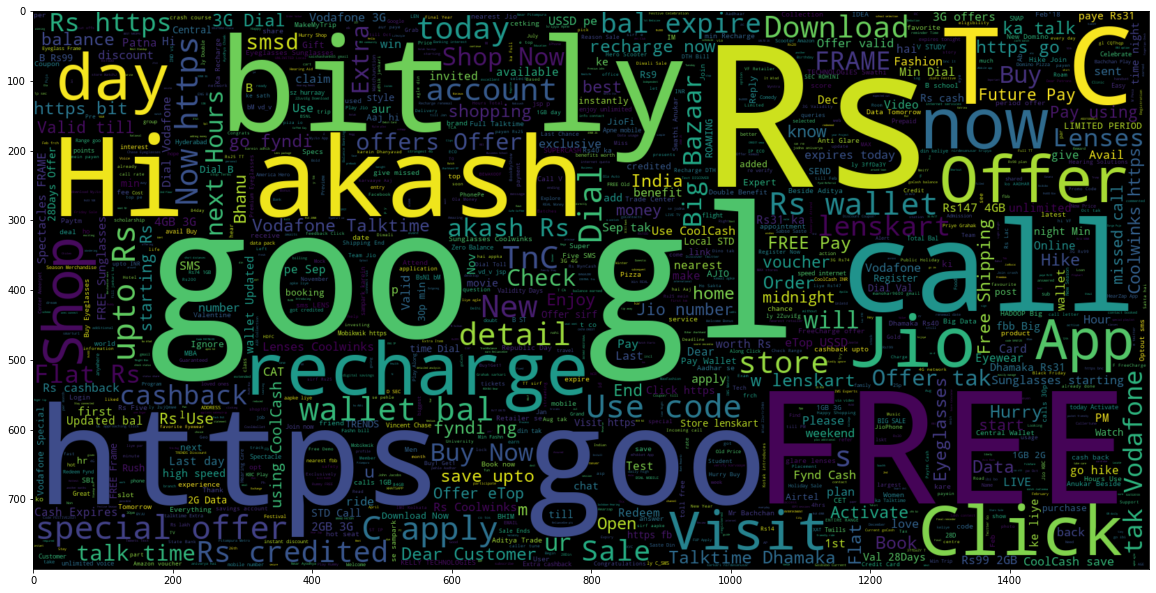

In [18]:
#spam

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.ham_spam_numeric == 1].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

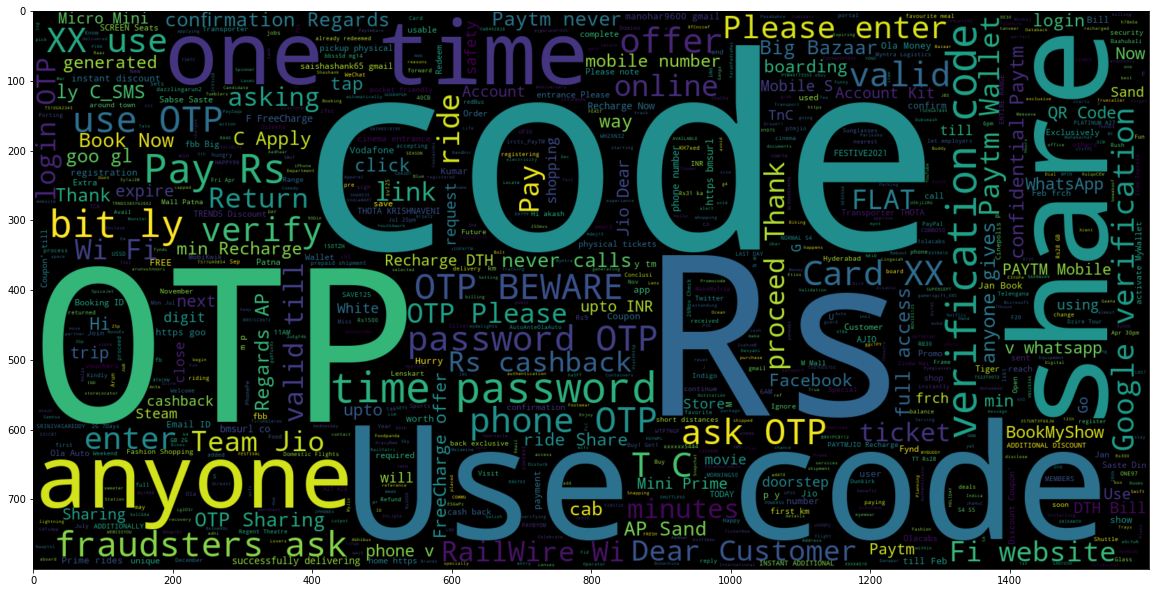

In [19]:
#OTP

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 0].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

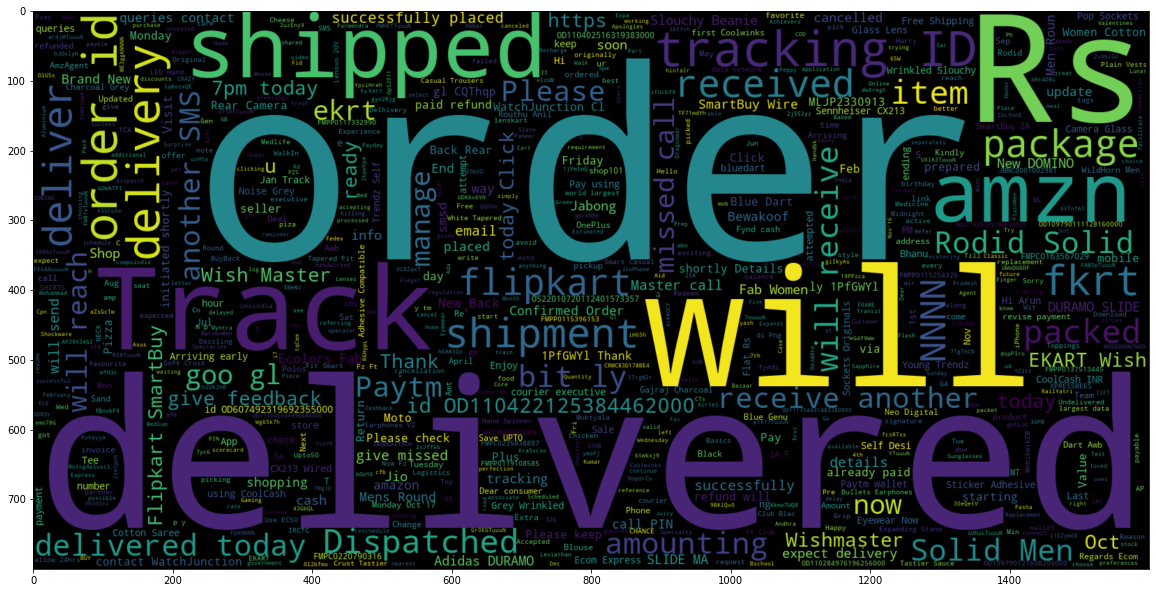

In [20]:
#delivery

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 1].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

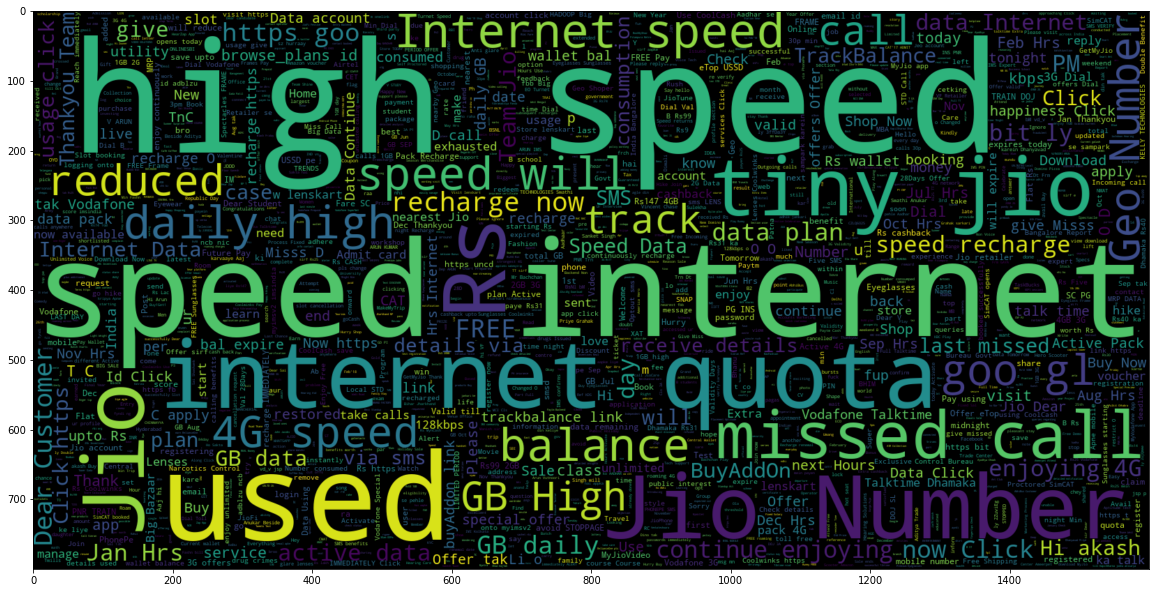

In [21]:
#other

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 2].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

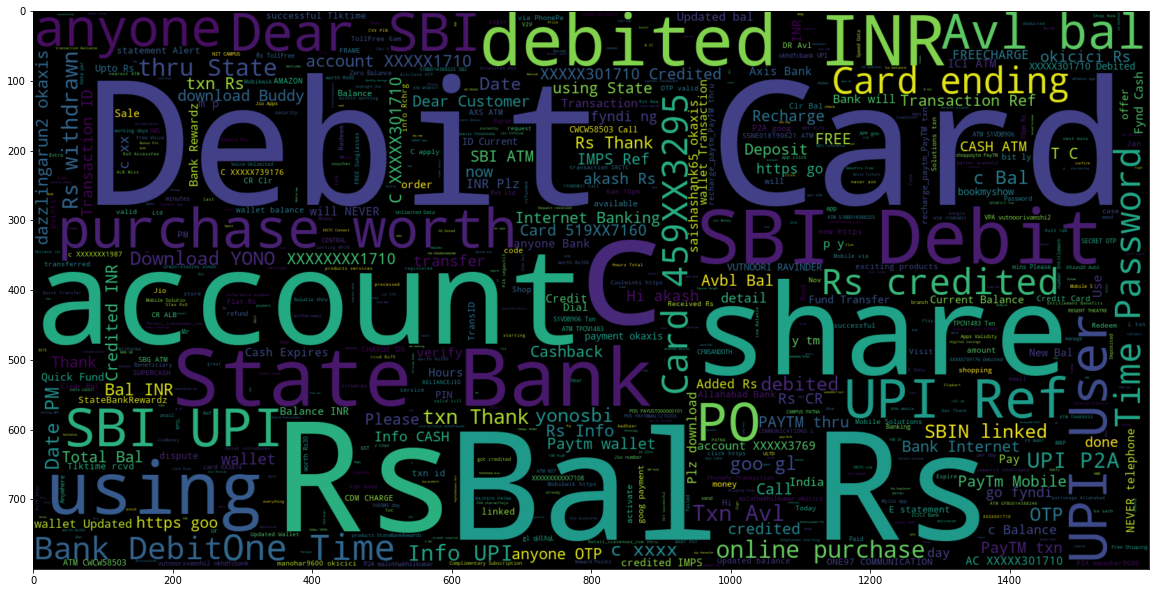

In [22]:
#transaction

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 3].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

# Vocab Building

In [23]:
import numpy as np 
import pandas as pd 
import csv
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
%matplotlib inline
 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import pickle
from sklearn import tree


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer 
from sklearn.ensemble import VotingClassifier


!pip install gensim
import gensim
from gensim.models import Word2Vec
import logging

vectorisor = CountVectorizer(ngram_range = (1, 3),decode_error="replace")
vec_train =vectorisor.fit_transform(data['message_clean'])

pickle.dump(vectorisor.vocabulary_,open("vocab/feature_transaction_message.pkl","wb"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
transformer=TfidfTransformer()
loadede_vec=CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("vocab/feature_transaction_message.pkl","rb")))

data1=transformer.fit_transform(loadede_vec.fit_transform(data['message_clean']))

In [25]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(data1, data['ham_spam_numeric'], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3114, 59447) (779, 59447) (3114,) (779,)


In [26]:
y_train.value_counts()

0    2255
1     859
Name: ham_spam_numeric, dtype: int64

In [27]:
y_test.value_counts()

0    560
1    219
Name: ham_spam_numeric, dtype: int64

Logistic Regression : 0.8973042362002568

Classification Report: 
               precision    recall  f1-score   support

         ham       0.88      0.99      0.93       560
        spam       0.96      0.66      0.78       219

    accuracy                           0.90       779
   macro avg       0.92      0.83      0.86       779
weighted avg       0.90      0.90      0.89       779


[[554   6]
 [ 74 145]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


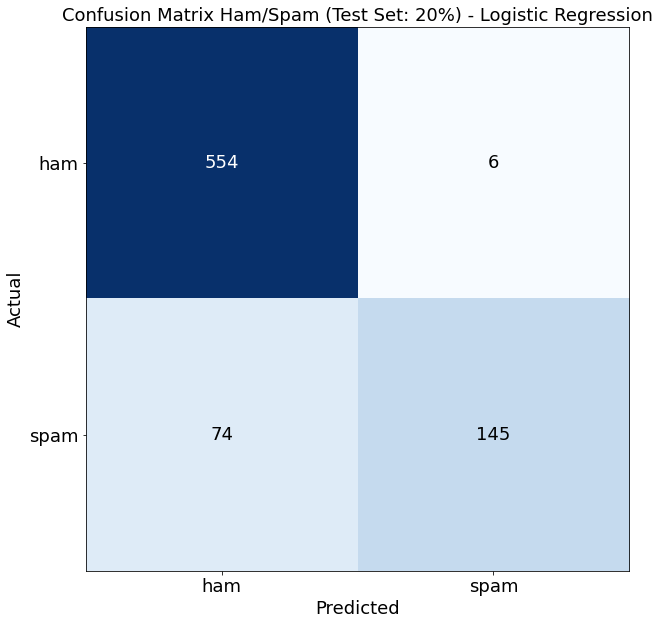

Naive Bayes : 0.8844672657252889

Classification Report: 
               precision    recall  f1-score   support

         ham       0.86      0.99      0.93       560
        spam       0.98      0.60      0.75       219

    accuracy                           0.88       779
   macro avg       0.92      0.80      0.84       779
weighted avg       0.90      0.88      0.87       779


[[557   3]
 [ 87 132]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


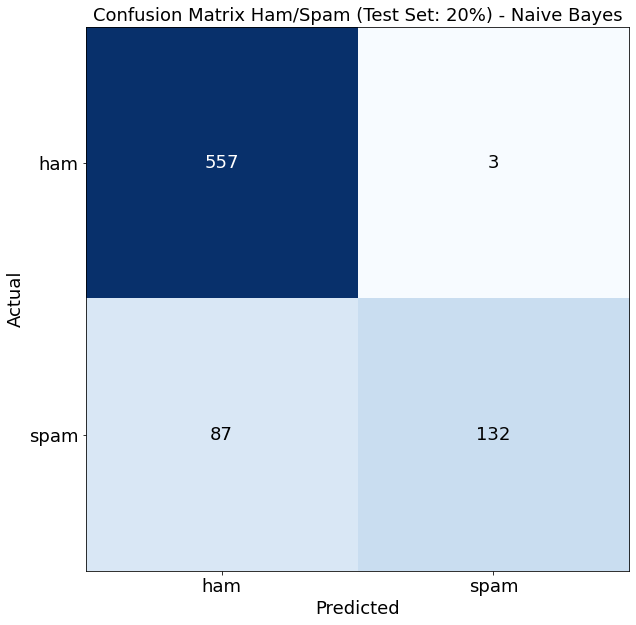

Random Forest : 0.9242618741976893

Classification Report: 
               precision    recall  f1-score   support

         ham       0.92      0.99      0.95       560
        spam       0.95      0.77      0.85       219

    accuracy                           0.92       779
   macro avg       0.93      0.88      0.90       779
weighted avg       0.93      0.92      0.92       779


[[552   8]
 [ 51 168]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


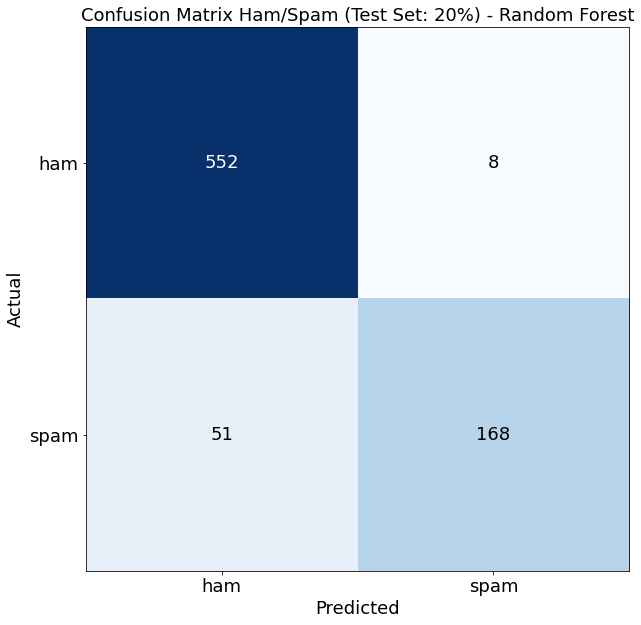

Support Vector Machine : 0.926829268292683

Classification Report: 
               precision    recall  f1-score   support

         ham       0.92      0.98      0.95       560
        spam       0.94      0.79      0.86       219

    accuracy                           0.93       779
   macro avg       0.93      0.89      0.90       779
weighted avg       0.93      0.93      0.92       779


[[548  12]
 [ 45 174]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


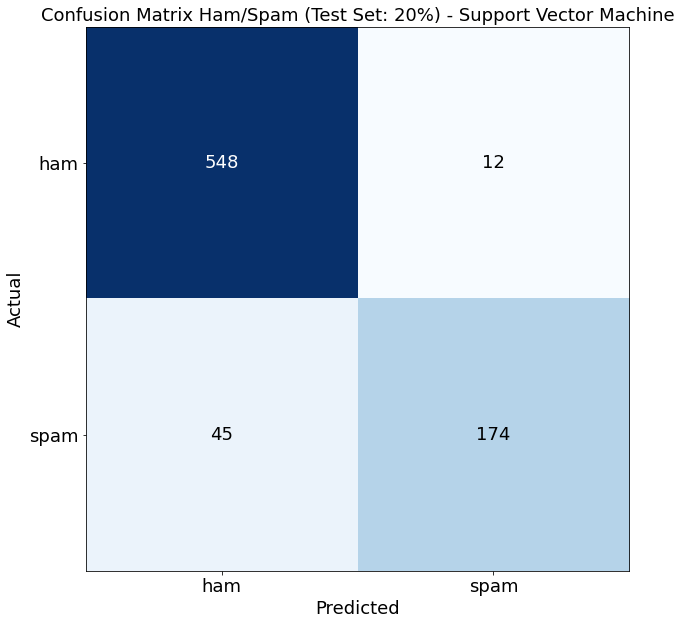

Ensamble : 0.9216944801026957

Classification Report: 
               precision    recall  f1-score   support

         ham       0.91      0.99      0.95       560
        spam       0.95      0.76      0.84       219

    accuracy                           0.92       779
   macro avg       0.93      0.87      0.90       779
weighted avg       0.92      0.92      0.92       779


[[552   8]
 [ 53 166]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


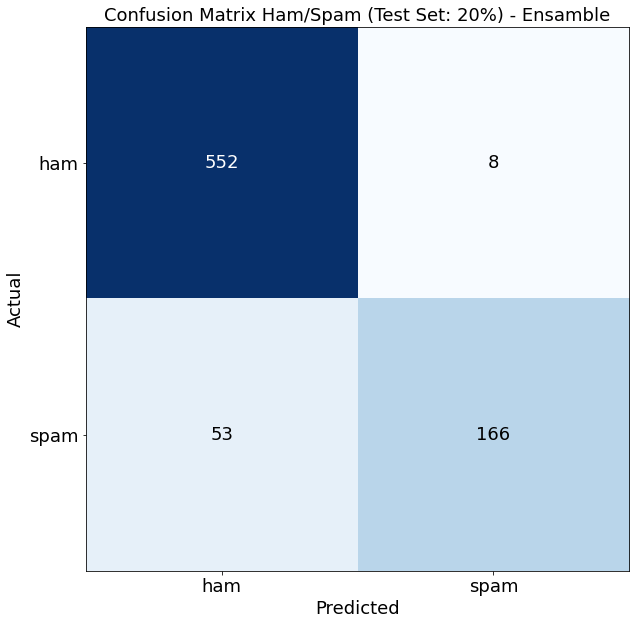

In [28]:
import numpy as num
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

target_ham = ['ham', 'spam']

plt.rcParams.update({'font.size': 18})



clfs = {
        'Logistic Regression': LogisticRegression(), 
        'Naive Bayes': MultinomialNB(),   
        'Random Forest': RandomForestClassifier(), 
        'Support Vector Machine': SVC(kernel = 'linear', probability = True),
        'Ensamble' : VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                  ('rf', RandomForestClassifier()),
                                                  ('svm', SVC(kernel = 'linear', probability = True))], voting='hard')
 
       }


def test_clf(clf_dict, Xtrain, ytrain, Xtest, ytest):
    for clf_name, clf in clf_dict.items():
        clf.fit(Xtrain, ytrain)
        predicted = clf.predict(Xtest)
        print(clf_name,":",np.mean(predicted == ytest))
        print()
        print("Classification Report: \n",classification_report(ytest, predicted, target_names = target_ham))
        print() 
        cm = confusion_matrix(ytest, predicted)
        print(cm)
        fig, ax = plot_confusion_matrix(conf_mat = cm)
        plt.title('Confusion Matrix Ham/Spam (Test Set: 20%) - '+clf_name, fontsize=18)
        fig.set_size_inches(10,10)
        ax.set_xticklabels([''] + target_ham, fontsize=18)
        ax.set_yticklabels([''] + target_ham, fontsize=18)
        plt.xlabel('Predicted', fontsize=18)
        plt.ylabel('Actual', fontsize=18)
        plt.show()
      
       
        
        
        
test_clf(clfs, X_train, y_train, X_test, y_test)